# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

Note: you may need to restart the kernel to use updated packages.
'C:\Users\Beep' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities [0]

api_url = 'http://api.openweathermap.org/data/2.5/weather?q={city name}&appid=' 
units = "imperial"
response = requests.get(api_url.replace("{city name}",cities[0]) + weather_api_key + "&units=" + units
).json()

response



{'coord': {'lon': -69.3632, 'lat': 77.484},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 38.89,
  'feels_like': 38.89,
  'temp_min': 38.89,
  'temp_max': 38.89,
  'pressure': 1010,
  'humidity': 79,
  'sea_level': 1010,
  'grnd_level': 1006},
 'visibility': 3748,
 'wind': {'speed': 2.66, 'deg': 134, 'gust': 1.28},
 'clouds': {'all': 71},
 'dt': 1624648092,
 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0},
 'timezone': -10800,
 'id': 3831208,
 'name': 'Qaanaaq',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_response = []
units = "imperial"
for api_city_call in cities:
    response = requests.get(api_url.replace("{city name}",api_city_call) + weather_api_key + "&units=" + units).json()
    if "name" in response:
        print("City Name: " + response['name'] + " \t" + "City ID: " + str(response['id']))
        city_response.append(response)

y ID: 286621
City Name: Narsaq 	City ID: 3421719
City Name: Port Elizabeth 	City ID: 964420
City Name: Kirakira 	City ID: 2178753
City Name: Huarmey 	City ID: 3939168
City Name: Mataura 	City ID: 6201424
City Name: Hirara 	City ID: 1862505
City Name: Uyuni 	City ID: 3901903
City Name: Saskylakh 	City ID: 2017155
City Name: Kuala Terengganu 	City ID: 1734705
City Name: Nea Kios 	City ID: 256606
City Name: Alofi 	City ID: 4036284
City Name: Ribeira Grande 	City ID: 3372707
City Name: Atuona 	City ID: 4020109
City Name: Barrow 	City ID: 5880054
City Name: Tandaltī 	City ID: 366426
City Name: Kralendijk 	City ID: 3513563
City Name: Mar del Plata 	City ID: 3430863
City Name: Souillac 	City ID: 933995
City Name: Channel-Port aux Basques 	City ID: 5919815
City Name: East London 	City ID: 1006984
City Name: Punta Arenas 	City ID: 3874787
City Name: Kahului 	City ID: 5847411
City Name: Port Alfred 	City ID: 964432
City Name: Bambous Virieux 	City ID: 1106677
City Name: San Patricio 	City ID: 47

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
print(len(city_response))
for humid_city_index in range(len(city_response)):
    if city_response[humid_city_index]['main']["humidity"] > 100:
        city_response.pop(humid_city_index)
        humid_city_index -=1
print(len(city_response))

575
575


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = pd.DataFrame(columns=['City',
                                      'Lat',
                                      'Longitude',
                                      'Max Temp',
                                      'Humidity',
                                      'Cloudiness',
                                      'Wind Speed',
                                      'Country'])
clean_city_df
# temp_response = city_response[0]
# clean_city_df = clean_city_df.append({
#                                       'City':temp_response['name'],
#                                       'Lat':temp_response['coord']['lat'],
#                                       'Longitude':temp_response['coord']['lon'],
#                                       'Max Temp':temp_response['main']['temp_max'],
#                                       'Humidity':temp_response['main']['humidity'],
#                                       'Cloudiness':temp_response['clouds']['all'],
#                                       'Wind Speed':temp_response['wind']['speed'],
#                                       'Country':temp_response['sys']['country']
#                                         },ignore_index = True)

for rep in city_response:
    clean_city_df = clean_city_df.append({
                                      'City':rep['name'],
                                      'Lat':rep['coord']['lat'],
                                      'Longitude':rep['coord']['lon'],
                                      'Max Temp':rep['main']['temp_max'],
                                      'Humidity':rep['main']['humidity'],
                                      'Cloudiness':rep['clouds']['all'],
                                      'Wind Speed':rep['wind']['speed'],
                                      'Country':rep['sys']['country']
                                        },ignore_index = True)
                                    

In [12]:
clean_city_df.to_csv(path_or_buf="clean_city_df.csv",index=False)
clean_city_df


,City,Lat,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Qaanaaq,77.4840,-69.3632,38.89,79,71,2.66,GL
1,Carnarvon,-24.8667,113.6333,48.27,38,66,10.36,AU
2,Kavieng,-2.5744,150.7967,81.82,77,100,10.02,PG
3,Butaritari,3.0707,172.7902,81.82,78,100,12.77,KI
4,Half Moon Bay,37.4636,-122.4286,83.59,71,75,1.01,US
...,...,...,...,...,...,...,...,...
570,Andra,62.5147,65.8878,60.03,52,100,6.17,RU
571,Carballo,43.2130,-8.6910,80.02,80,7,5.55,ES
572,Klichka,50.4457,117.9960,57.97,91,39,6.22,RU
573,Orange Cove,36.6244,-119.3137,91.85,42,1,4.61,US


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

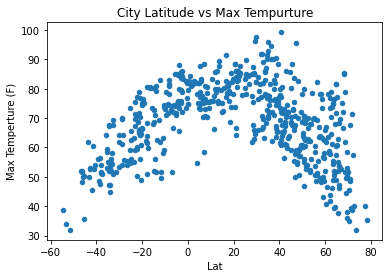

In [13]:
lat_temp_plot = clean_city_df.plot(kind="scatter", x='Lat',y='Max Temp', title="City Latitude vs Max Tempurture")
lat_temp_plot.set_ylabel("Max Temperture (F)")
plt.show()

## Latitude vs. Humidity Plot

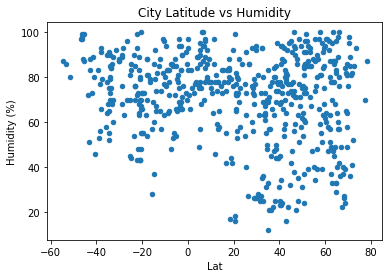

In [14]:
lat_temp_plot = clean_city_df.plot(kind="scatter", x='Lat',y='Humidity', title="City Latitude vs Humidity")
lat_temp_plot.set_ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

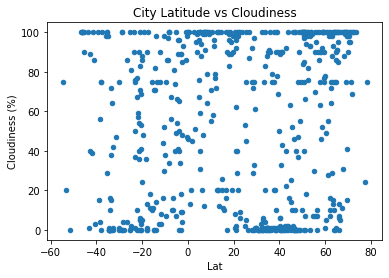

In [15]:
lat_temp_plot = clean_city_df.plot(kind="scatter", x='Lat',y='Cloudiness', title="City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

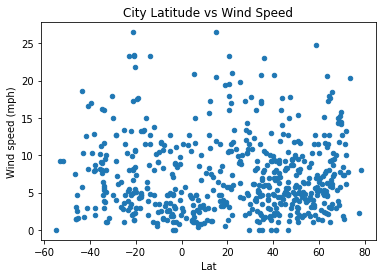

In [16]:
lat_temp_plot = clean_city_df.plot(kind="scatter", x='Lat',y='Wind Speed', title="City Latitude vs Wind Speed")
lat_temp_plot.set_ylabel("Wind speed (mph)")
plt.show()

## Linear Regression

In [17]:
north_df = clean_city_df[clean_city_df['Lat'] >= 0]
north_df

,City,Lat,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
1,Nanortalik,60.1432,-45.2371,40.62,97,100,10.36,GL
3,Ust-Nera,64.5667,143.2000,71.82,29,86,3.04,RU
5,Vidim,56.4088,103.1106,69.21,48,0,3.02,RU
6,Asău,46.4333,26.4000,65.95,100,0,4.79,RO
11,Batagay,67.6333,134.6333,72.18,37,31,2.91,RU
...,...,...,...,...,...,...,...,...
570,Barra Patuca,15.8000,-84.2833,80.31,78,10,6.46,HN
572,‘Āhuimanu,21.4447,-157.8378,83.91,56,40,11.50,US
573,Batagay-Alyta,67.8006,130.4114,66.61,40,100,5.41,RU
574,Homer,59.6425,-151.5483,58.08,75,90,11.50,US


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

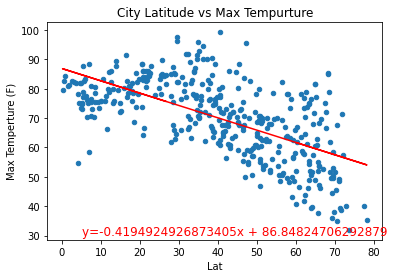

In [18]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = north_df.plot(kind="scatter", x='Lat',y='Max Temp', title="City Latitude vs Max Tempurture")
lat_temp_plot.set_ylabel("Max Temperture (F)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

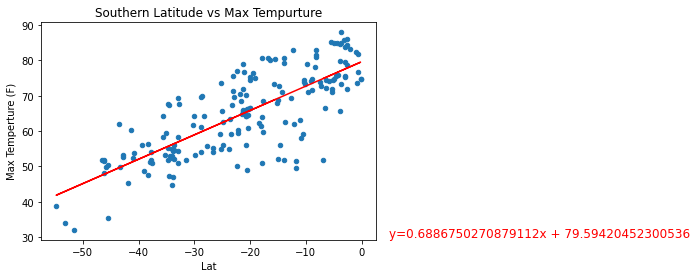

In [20]:
south_df = clean_city_df[clean_city_df['Lat'] < 0]
south_df

x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = south_df.plot(kind="scatter", x='Lat',y='Max Temp', title="Southern Latitude vs Max Tempurture")
lat_temp_plot.set_ylabel("Max Temperture (F)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

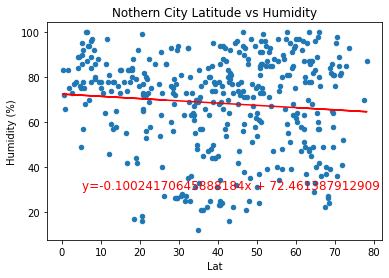

In [23]:
x_values = north_df['Lat']
y_values = np.array(north_df['Humidity'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = north_df.plot(kind="scatter", x='Lat',y='Humidity', title="Nothern City Latitude vs Humidity")
lat_temp_plot.set_ylabel("Humidity (%)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

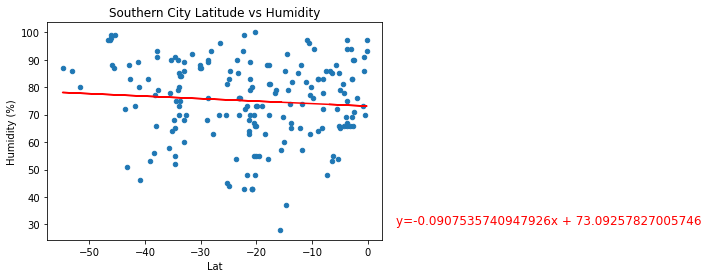

In [24]:
x_values = south_df['Lat']
y_values = np.array(south_df['Humidity'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = south_df.plot(kind="scatter", x='Lat',y='Humidity', title="Southern City Latitude vs Humidity")
lat_temp_plot.set_ylabel("Humidity (%)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

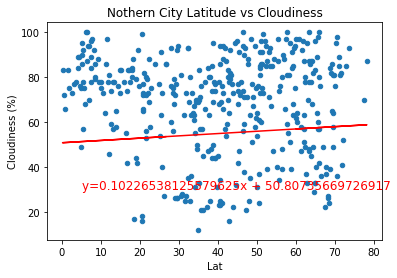

In [25]:
x_values = north_df['Lat']
y_values = np.array(north_df['Cloudiness'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = north_df.plot(kind="scatter", x='Lat',y='Humidity', title="Nothern City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Cloudiness (%)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

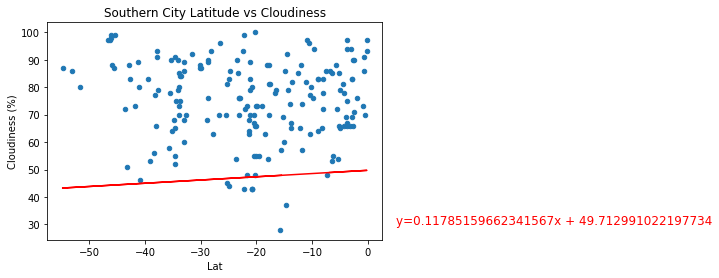

In [27]:
x_values = south_df['Lat']
y_values = np.array(south_df['Cloudiness'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = south_df.plot(kind="scatter", x='Lat',y='Humidity', title="Southern City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Cloudiness (%)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

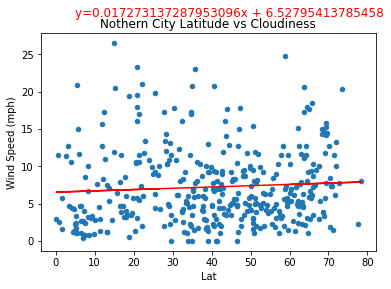

In [28]:
x_values = north_df['Lat']
y_values = np.array(north_df['Wind Speed'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = north_df.plot(kind="scatter", x='Lat',y='Wind Speed', title="Nothern City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Wind Speed (mph)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

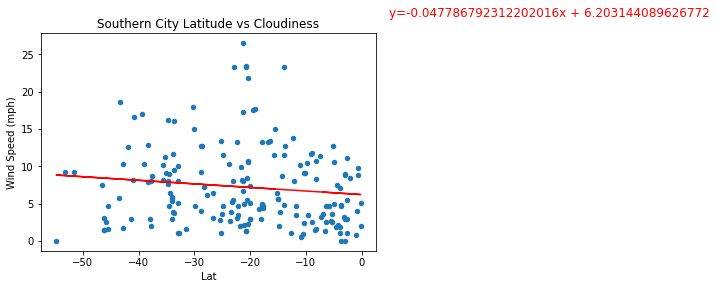

In [30]:
x_values = south_df['Lat']
y_values = np.array(south_df['Wind Speed'],dtype=np.float32)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept


lat_temp_plot = south_df.plot(kind="scatter", x='Lat',y='Wind Speed', title="Southern City Latitude vs Cloudiness")
lat_temp_plot.set_ylabel("Wind Speed (mph)")
plt.text(5, 30, 'y='+str(slope) + "x + " + str(intercept),fontsize=12, color='red')
plt.plot(x_values,regress_values,color='red')

plt.show()